In [1]:
import numpy as np
import pandas as pd

In [2]:
comcast = pd.read_csv("Comcast_telecom_complaints_data.csv")
comcast

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


# Providing trend chart for number of complaints at daily and monthly granularity levels

In [3]:
comcast["Date"] = pd.to_datetime(comcast["Date"])
comcast["Date_month_year"] = pd.to_datetime(comcast["Date_month_year"])

In [4]:
comcast["Day"] = comcast["Date_month_year"].dt.day

In [5]:
comcast["Month"] = comcast["Date_month_year"].dt.month

In [6]:
comcast

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,4,2
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,2
2221,331188,complaint about comcast,2015-06-09,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,6,9
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,23,6


In [7]:
comcast_complaint_per_day = comcast.groupby("Day")["Customer Complaint"].nunique()
comcast_complaint_per_day

Day
4     192
5     124
6     244
13     66
14     52
15     55
16     63
17     57
18     64
19     47
20     46
21     39
22     63
23    211
24    229
25    112
26     85
27     77
28     78
29     84
30     83
31     10
Name: Customer Complaint, dtype: int64

In [8]:
comcast_complaint_per_month = comcast.groupby("Month")["Customer Complaint"].nunique()
comcast_complaint_per_month

Month
1      52
2      55
3      43
4     340
5     284
6     896
7      47
8      65
9      52
10     48
11     37
12     60
Name: Customer Complaint, dtype: int64

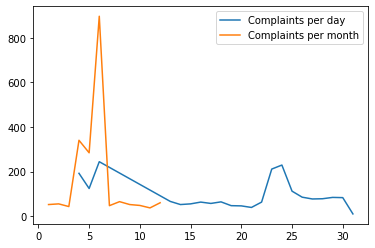

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(comcast_complaint_per_day, label = "Complaints per day")
plt.plot(comcast_complaint_per_month, label = "Complaints per month")
plt.legend()
plt.show()

# Provinding table of frequency of complaint types

## Checking the complaint type with maximum frequency 

In [10]:
complaint_frequency = comcast["Customer Complaint"].value_counts()
complaint_frequency

Comcast                                        83
Comcast Internet                               18
Comcast Data Cap                               17
comcast                                        13
Comcast Data Caps                              11
                                               ..
Forced data capping                             1
comcast fees and internet services              1
Comcast issues don't get resolved               1
Pricing Concerns                                1
Billed for services not ordered or recieved     1
Name: Customer Complaint, Length: 1840, dtype: int64

In [11]:
comcast_frequency_df = pd.DataFrame(complaint_frequency)
comcast_frequency_df = comcast_frequency_df.reset_index()
comcast_frequency_df.columns = ["Complaint Type", "No. of complaints"]
comcast_frequency_df

,Complaint Type,No. of complaints
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11
...,...,...
1835,Forced data capping,1
1836,comcast fees and internet services,1
1837,Comcast issues don't get resolved,1
1838,Pricing Concerns,1


So, it can be seen that the highest frequency complaint is for comcast itself.

# Creating a new categorical variable, Open for open and pending cases, and Closed for closed and solved cases

In [12]:
comcast.loc[comcast["Status"] == "Open", "Status Check"] = "Open"
comcast.loc[comcast["Status"] == "Pending", "Status Check"] = "Open"
comcast.loc[comcast["Status"] == "Closed", "Status Check"] = "Closed"
comcast.loc[comcast["Status"] == "Solved", "Status Check"] = "Closed"
comcast

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Status Check
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,Closed
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,Open
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,4,2,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,2,Closed
2221,331188,complaint about comcast,2015-06-09,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,6,9,Closed
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,23,6,Closed


# Providing state wise status of complaints in a stacked bar chart and use the categorized variable from above question 

In [13]:
complaint_by_status = comcast.groupby("State")["Status Check"].value_counts().unstack()
complaint_by_status

Status Check,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


In [14]:
complaint_by_status["Open"] = complaint_by_status["Open"].replace(np.nan, 0.0)
complaint_by_status = complaint_by_status.reset_index()
complaint_by_status

Status Check,State,Closed,Open
0,Alabama,17.0,9.0
1,Arizona,14.0,6.0
2,Arkansas,6.0,0.0
3,California,159.0,61.0
4,Colorado,58.0,22.0
5,Connecticut,9.0,3.0
6,Delaware,8.0,4.0
7,District Of Columbia,14.0,2.0
8,District of Columbia,1.0,0.0
9,Florida,201.0,39.0


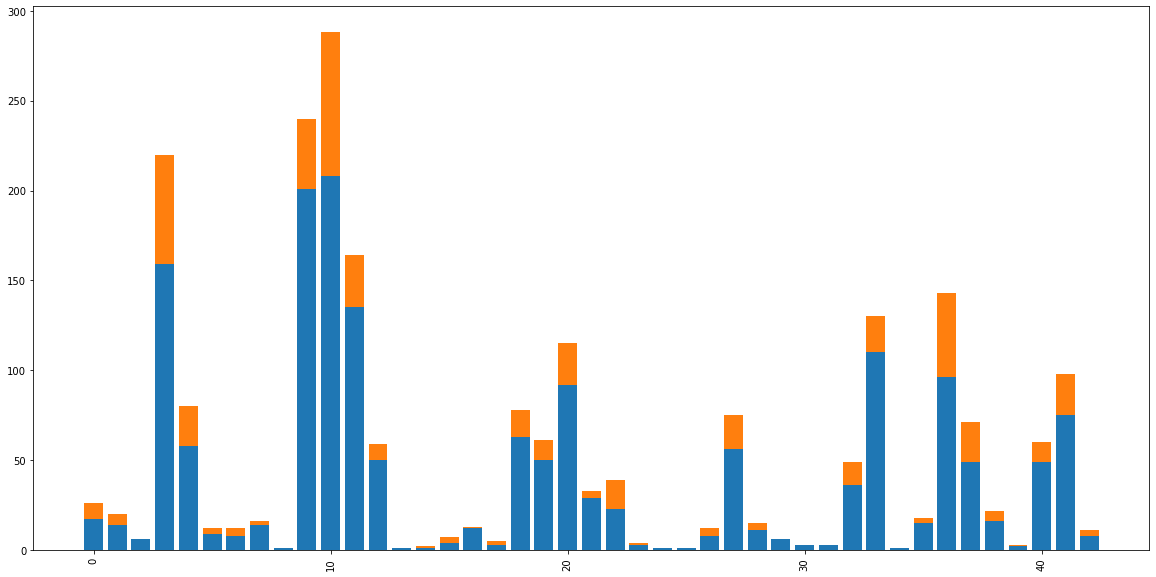

In [15]:
x = complaint_by_status.index

fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(x, complaint_by_status["Closed"], label = "Closed Complaints")
ax.bar(x, complaint_by_status["Open"], bottom = complaint_by_status["Closed"], label = "Open Complaints" )
plt.xticks(rotation = 90)
plt.show()

# Providing insight on

## State having the maximum complaints

In [16]:
state_total_complaints = {}
for i, closed_complaints, open_complaints in zip(complaint_by_status["State"], complaint_by_status["Closed"], complaint_by_status["Open"]):
    if i not in state_total_complaints:
        state_total_complaints[i] = 0
    total_complaints = closed_complaints + open_complaints
    state_total_complaints[i] = total_complaints
state_total_complaints

{'Alabama': 26.0,
 'Arizona': 20.0,
 'Arkansas': 6.0,
 'California': 220.0,
 'Colorado': 80.0,
 'Connecticut': 12.0,
 'Delaware': 12.0,
 'District Of Columbia': 16.0,
 'District of Columbia': 1.0,
 'Florida': 240.0,
 'Georgia': 288.0,
 'Illinois': 164.0,
 'Indiana': 59.0,
 'Iowa': 1.0,
 'Kansas': 2.0,
 'Kentucky': 7.0,
 'Louisiana': 13.0,
 'Maine': 5.0,
 'Maryland': 78.0,
 'Massachusetts': 61.0,
 'Michigan': 115.0,
 'Minnesota': 33.0,
 'Mississippi': 39.0,
 'Missouri': 4.0,
 'Montana': 1.0,
 'Nevada': 1.0,
 'New Hampshire': 12.0,
 'New Jersey': 75.0,
 'New Mexico': 15.0,
 'New York': 6.0,
 'North Carolina': 3.0,
 'Ohio': 3.0,
 'Oregon': 49.0,
 'Pennsylvania': 130.0,
 'Rhode Island': 1.0,
 'South Carolina': 18.0,
 'Tennessee': 143.0,
 'Texas': 71.0,
 'Utah': 22.0,
 'Vermont': 3.0,
 'Virginia': 60.0,
 'Washington': 98.0,
 'West Virginia': 11.0}

In [17]:
max(state_total_complaints, key = state_total_complaints.get), max(state_total_complaints.values())

('Georgia', 288.0)

The state with highest open and closed complaints is Georgia with 288 complaints

## State having the highest percentage of unresolved complaints

In [18]:
state_percent_unresolved_complaints = {}
for i, closed_complaints, open_complaints in zip(complaint_by_status["State"], complaint_by_status["Closed"], complaint_by_status["Open"]):
    if i not in state_percent_unresolved_complaints:
        state_percent_unresolved_complaints[i] = 0
    total_complaints = closed_complaints + open_complaints
    percent_unresolved_complaints = round((open_complaints/total_complaints) * 100, 2)
    state_percent_unresolved_complaints[i] = percent_unresolved_complaints
state_percent_unresolved_complaints

{'Alabama': 34.62,
 'Arizona': 30.0,
 'Arkansas': 0.0,
 'California': 27.73,
 'Colorado': 27.5,
 'Connecticut': 25.0,
 'Delaware': 33.33,
 'District Of Columbia': 12.5,
 'District of Columbia': 0.0,
 'Florida': 16.25,
 'Georgia': 27.78,
 'Illinois': 17.68,
 'Indiana': 15.25,
 'Iowa': 0.0,
 'Kansas': 50.0,
 'Kentucky': 42.86,
 'Louisiana': 7.69,
 'Maine': 40.0,
 'Maryland': 19.23,
 'Massachusetts': 18.03,
 'Michigan': 20.0,
 'Minnesota': 12.12,
 'Mississippi': 41.03,
 'Missouri': 25.0,
 'Montana': 0.0,
 'Nevada': 0.0,
 'New Hampshire': 33.33,
 'New Jersey': 25.33,
 'New Mexico': 26.67,
 'New York': 0.0,
 'North Carolina': 0.0,
 'Ohio': 0.0,
 'Oregon': 26.53,
 'Pennsylvania': 15.38,
 'Rhode Island': 0.0,
 'South Carolina': 16.67,
 'Tennessee': 32.87,
 'Texas': 30.99,
 'Utah': 27.27,
 'Vermont': 33.33,
 'Virginia': 18.33,
 'Washington': 23.47,
 'West Virginia': 27.27}

In [19]:
max(state_percent_unresolved_complaints, key = state_percent_unresolved_complaints.get), max(state_percent_unresolved_complaints.values())

('Kansas', 50.0)

The state with highest percent of unresolved complaints is Kansas with 50% of complaints unresolved

# Providing percentage of complaints resolved, which were received through the Internet and customer care calls

In [20]:
status_complaint_registered_means = comcast.groupby("Received Via")["Status Check"].value_counts().unstack()
status_complaint_registered_means

Status Check,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [21]:
status_complaint_registered_means = status_complaint_registered_means.reset_index()
status_complaint_registered_means

Status Check,Received Via,Closed,Open
0,Customer Care Call,864,255
1,Internet,843,262


In [22]:
percent_complaints_registered = {}
for i, resolved, unresolved in zip(status_complaint_registered_means["Received Via"], status_complaint_registered_means["Closed"], status_complaint_registered_means["Open"]):
    if i not in percent_complaints_registered:
        percent_complaints_registered[i] = 0
    total = resolved + unresolved
    resolved_percent = round((resolved/total) * 100, 2)
    percent_complaints_registered[i] = resolved_percent
percent_complaints_registered

{'Customer Care Call': 77.21, 'Internet': 76.29}

77.21% of complaints were resolved through customer care calls and 76.29% complaints were resolved through Internet